In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from modules.categorical_data_coding import code_data
from modules.model_runer import find_n_neighbors, test_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/10_Que_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,14.0533,14.5264,14.3738,14.2975,14.2364,14.6942,14.8163,14.9231,14.6179,14.8773,...,16.1896,16.0522,16.5558,15.9760,14.9841,15.5334,16.0522,15.8844,15.9149,0Ca/10Que
1,15.7013,15.1520,15.4877,15.2435,15.1520,15.1825,15.9302,15.7776,15.2283,15.6708,...,16.7541,16.4947,16.2659,16.0370,15.4114,15.6708,15.5640,15.6860,16.0980,0Ca/10Que
2,15.3503,15.2130,15.6555,16.1133,15.8997,16.4947,16.8152,16.4337,15.3198,15.1978,...,15.1672,15.3198,15.3198,14.9536,15.2435,15.6097,15.1062,15.4419,14.9994,0Ca/10Que
3,15.2435,15.6097,16.1591,16.0065,15.4419,15.3961,15.8539,14.9841,14.7858,15.3198,...,15.9454,15.6097,15.7471,15.8234,15.2130,15.2283,15.8081,15.4114,15.5029,0Ca/10Que
4,15.4877,14.8621,14.6790,15.7318,15.8844,15.1825,15.2588,15.0909,15.4724,16.5100,...,15.2130,15.4419,15.9302,16.6626,15.9760,15.3961,15.8081,15.5945,14.8010,0Ca/10Que


In [4]:
list(df.target.unique())

['0Ca/10Que', '10Ca/10Que', '100Ca/10Que']

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,14.0533,14.5264,14.3738,14.2975,14.2364,14.6942,14.8163,14.9231,14.6179,14.8773,...,16.1896,16.0522,16.5558,15.9760,14.9841,15.5334,16.0522,15.8844,15.9149,0
1,15.7013,15.1520,15.4877,15.2435,15.1520,15.1825,15.9302,15.7776,15.2283,15.6708,...,16.7541,16.4947,16.2659,16.0370,15.4114,15.6708,15.5640,15.6860,16.0980,0
2,15.3503,15.2130,15.6555,16.1133,15.8997,16.4947,16.8152,16.4337,15.3198,15.1978,...,15.1672,15.3198,15.3198,14.9536,15.2435,15.6097,15.1062,15.4419,14.9994,0
3,15.2435,15.6097,16.1591,16.0065,15.4419,15.3961,15.8539,14.9841,14.7858,15.3198,...,15.9454,15.6097,15.7471,15.8234,15.2130,15.2283,15.8081,15.4114,15.5029,0
4,15.4877,14.8621,14.6790,15.7318,15.8844,15.1825,15.2588,15.0909,15.4724,16.5100,...,15.2130,15.4419,15.9302,16.6626,15.9760,15.3961,15.8081,15.5945,14.8010,0


# Distance-based algorithms

In [6]:
scaler = MinMaxScaler()

In [7]:
distance_based_df = scaler.fit_transform(df.values)
distance_based_df = pd.DataFrame(distance_based_df)
distance_based_df.columns = df.columns
distance_based_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,0.115015,0.133508,0.129614,0.114464,0.115290,0.153264,0.138359,0.144558,0.138838,0.132658,...,0.176785,0.175524,0.196964,0.177112,0.135075,0.146677,0.150308,0.154072,0.156267,0.0
1,0.162609,0.151279,0.161688,0.142077,0.141796,0.166964,0.169922,0.168229,0.155823,0.154911,...,0.193176,0.188476,0.188667,0.178852,0.147477,0.150692,0.135866,0.148231,0.161549,0.0
2,0.152472,0.153012,0.166520,0.167465,0.163441,0.203780,0.194999,0.186403,0.158369,0.141646,...,0.147097,0.154087,0.161588,0.147955,0.142603,0.148907,0.122324,0.141046,0.129856,0.0
3,0.149388,0.164281,0.181021,0.164348,0.150188,0.172957,0.167760,0.146248,0.143510,0.145067,...,0.169694,0.162572,0.173818,0.172760,0.141718,0.137763,0.143087,0.140148,0.144381,0.0
4,0.156440,0.143044,0.138402,0.156329,0.162998,0.166964,0.150898,0.149206,0.162615,0.178446,...,0.148427,0.157661,0.179058,0.196693,0.163863,0.142666,0.143087,0.145538,0.124133,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0.631526,0.687512,0.812871,0.807523,0.690021,0.670464,0.773982,0.831037,0.855999,0.863601,...,0.899463,0.919648,0.899696,0.863398,0.877809,0.885460,0.883395,0.889429,0.887454,1.0
1807,0.919286,0.898608,0.901183,0.883239,0.866712,0.868253,0.879048,0.850057,0.853028,0.854615,...,0.856044,0.872751,0.881353,0.826846,0.836621,0.834635,0.832840,0.845858,0.737794,1.0
1808,0.642101,0.659338,0.801008,0.868542,0.872456,0.867398,0.842727,0.850901,0.850056,0.825087,...,0.859146,0.867839,0.866066,0.845123,0.815808,0.834191,0.831937,0.857536,0.878653,1.0
1809,0.901219,0.864798,0.883607,0.888583,0.875990,0.855838,0.819382,0.827231,0.836894,0.822947,...,0.860031,0.837021,0.821520,0.829022,0.823337,0.799863,0.803953,0.803635,0.775648,1.0


In [8]:
X, y = np.array(distance_based_df.drop('target', axis=1)), np.array(df['target'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## k-Nearest Neighbors

In [10]:
knn = KNeighborsClassifier()

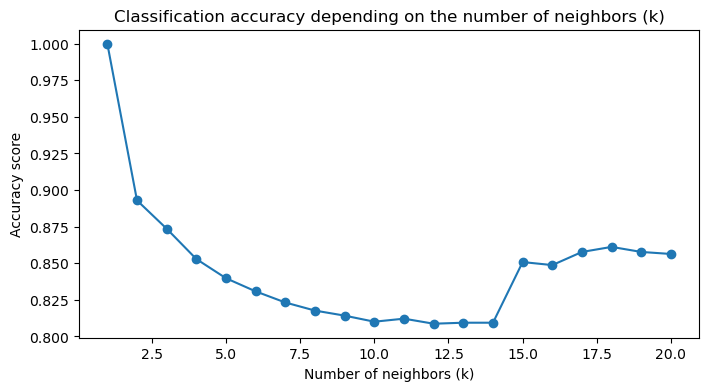

In [11]:
find_n_neighbors(knn, X_train, y_train, 21)

In [12]:
knn.set_params(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

 CV Scores: [0.83425414 0.82872928 0.82044199 0.80939227]
 CV Mean score: 0.8232044198895028


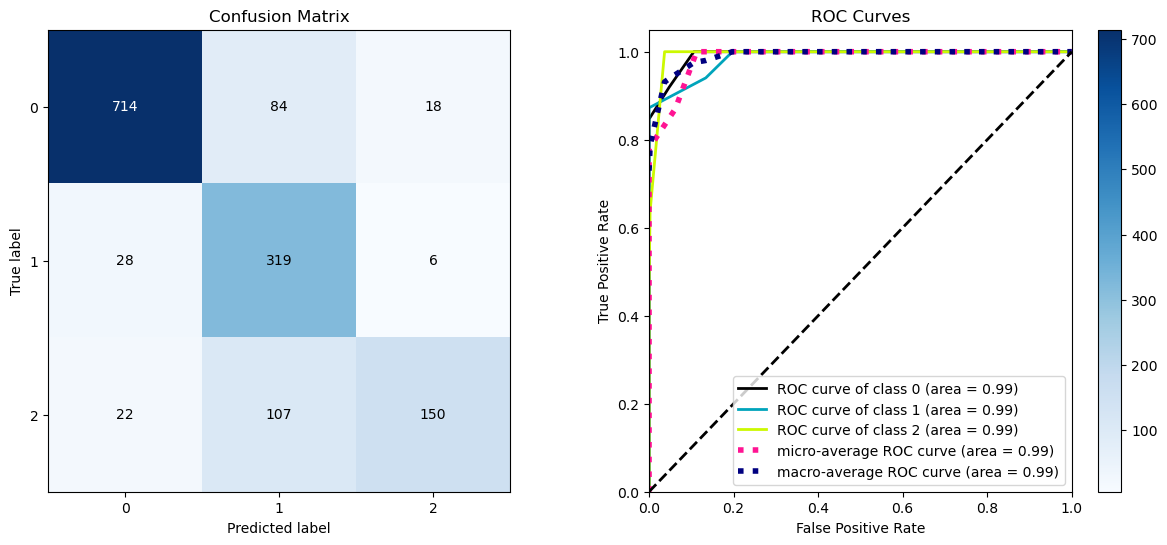

In [13]:
test_model(knn, X_train, y_train)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn_pred = knn.predict(X_test)

In [16]:
f1_score(knn_pred, y_test, average='weighted')

0.8285180489786069

In [17]:
accuracy_score(knn_pred, y_test)

0.8292011019283747

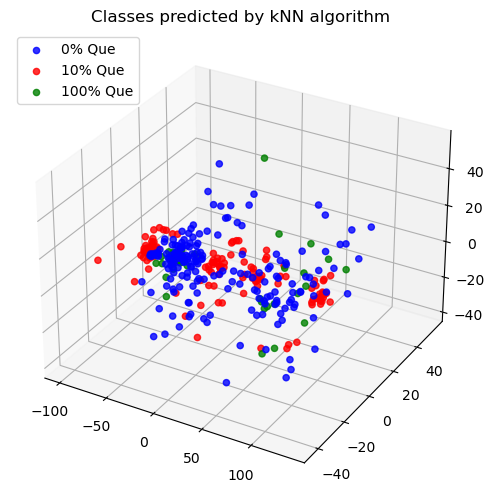

In [18]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by kNN algorithm", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Nearest Centroid

In [19]:
nc = NearestCentroid()

 CV Scores: [0.50552486 0.64640884 0.46961326 0.48342541]
 CV Mean score: 0.5262430939226519
This classifier has no attribute 'predict_proba' 


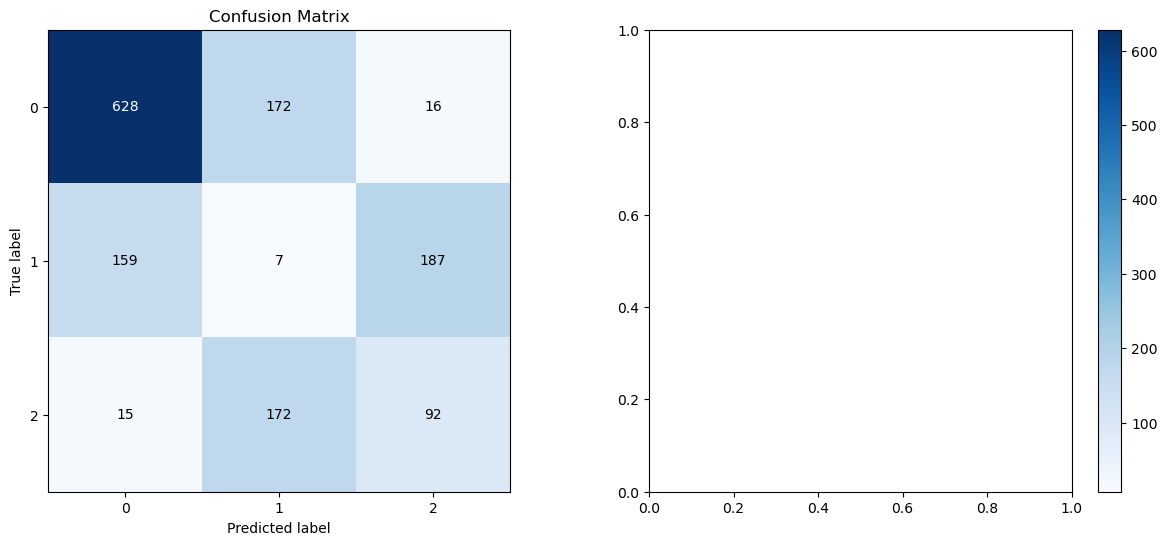

In [20]:
test_model(nc, X_train, y_train)

In [21]:
nc.fit(X_train, y_train)

NearestCentroid()

In [22]:
nc_pred = nc.predict(X_test)

In [23]:
f1_score(nc_pred, y_test, average='weighted')

0.5443437780822323

In [24]:
accuracy_score(nc_pred, y_test)

0.5399449035812672

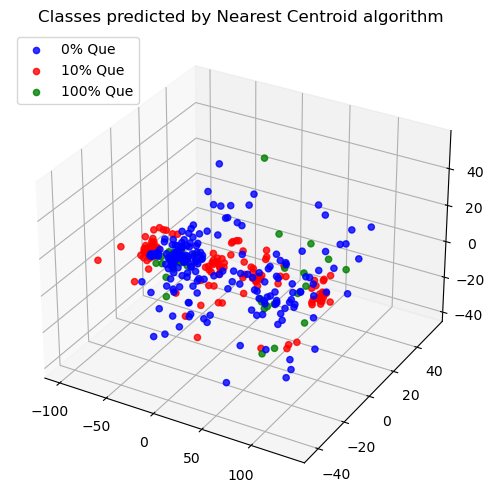

In [25]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by Nearest Centroid algorithm", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])